<a href="https://colab.research.google.com/github/Srourrzan/AI_refresher/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

What are loss functions?, optimizer? activation function? step function?

In [1]:
import tensorflow as tf

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data();

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist;
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000];
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:];
print(f"X_train.shape = {X_train.shape}");
print(f"X_train.dtype = {X_train.dtype}");

X_train.shape = (55000, 28, 28)
X_train.dtype = uint8


In [6]:
#scale pixel intensities down to the 0-1 range
X_train = X_train/255.0;
X_valid = X_valid/255.0;
X_test = X_test/255.0;

In [8]:
class_names: list = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "shirt", "Sneaker", "Bag", "Ankle boot"];
print(class_names[y_train[0]]);

Ankle boot


In [12]:
#Build a model using the Sequential API
tf.random.set_seed(42);
model = tf.keras.Sequential();
model.add(tf.keras.layers.InputLayer(shape=[28, 28]));
model.add(tf.keras.layers.Flatten());
model.add(tf.keras.layers.Dense(300, activation="relu"));
model.add(tf.keras.layers.Dense(100, activation="relu"));
model.add(tf.keras.layers.Dense(10, activation="softmax"));

In [14]:
# or we can write it as below:
# model = tf.keras.Sequential([
#     tf.keras.layers.Flatten(shape=[28, 28]),
#     tf.keras.layers.Dense(300, activation="relu"),
#     tf.keras.layers.Dense(100, activation="relu"),
#     tf.keras.layers.Dense(10, activation="softmax")
# ])

In [15]:
print(model.summary());

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

None


In [17]:
print(f"model.layers = {model.layers}");
hidden1 = model.layers[1];
print(f"hidden layer 1 = {hidden1.name}");
print(f"model.get_layer('dense') is hidden1 = {model.get_layer('dense_3') is hidden1}");

model.layers = [<Flatten name=flatten_1, built=True>, <Dense name=dense_3, built=True>, <Dense name=dense_4, built=True>, <Dense name=dense_5, built=True>]
hidden layer 1 = dense_3
model.get_layer('dense') is hidden1 = True


In [21]:
weights, biases = hidden1.get_weights();
print(f"weights:\n{weights}");
print(f"weights shape = {weights.shape}");
print(f"biases:\n {biases}");
print(f"biases shape= {biases.shape}");

weights:
[[-4.7410410e-02  6.0148001e-02  6.6811085e-02 ... -2.5922596e-02
  -4.0313262e-02  7.3857799e-02]
 [-6.2789947e-02 -2.8202869e-02 -8.7614357e-03 ... -2.3630511e-02
  -1.8705774e-02 -3.8772110e-02]
 [-4.3973222e-02  7.2655156e-03 -1.6903006e-02 ...  3.5504229e-02
  -4.0541567e-02 -3.5855193e-02]
 ...
 [ 2.8577775e-02 -3.5814941e-05  9.7477660e-03 ... -2.9287733e-02
  -9.4392896e-03  3.0573197e-02]
 [ 4.7290482e-02 -5.8769681e-02  5.1763684e-02 ...  2.1436945e-02
  -5.7193864e-02 -6.7089088e-02]
 [-3.4959555e-02 -5.1054724e-02 -4.5162067e-02 ... -3.2707147e-02
   2.8717853e-02 -4.5411795e-02]]
weights shape = (784, 300)
biases:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

The use of `sparse_categorical_crossentropy` loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. If instead we had one target probability per class for each instance (such as one-hot vectors, e.g. `[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,]` to represent class 3), then we would need to use the `categorical_crossentropy` loss instead. If we were doing binary classification or multilabel binary classification, then we would use the `sigmoid` activation function in the output layer instead of the `softmax` activation function, and we would use the `binary_crossentropy` loss. The `sgd` means that we will train the model using Stochastic Gradient Descent. In other words, Keras will perform the backpropagation algorithm.

In [22]:
#use compile to method to specify the loss function and optimizer to use
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"]);

In [23]:
history = model.fit(X_train, y_train, epochs=30, validation_data = (X_valid, y_valid));

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.1296 - loss: 2.3004 - val_accuracy: 0.1986 - val_loss: 2.2991
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.1638 - loss: 2.2992 - val_accuracy: 0.2018 - val_loss: 2.2980
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1815 - loss: 2.2980 - val_accuracy: 0.2188 - val_loss: 2.2966
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.1973 - loss: 2.2966 - val_accuracy: 0.2362 - val_loss: 2.2949
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2143 - loss: 2.2948 - val_accuracy: 0.2576 - val_loss: 2.2928
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2303 - loss: 2.2925 - val_accuracy: 0.2544 - val_loss: 2.2899
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2453 - loss: 2.2894 - val_accuracy: 0.2718 - val_loss: 2.2859
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.2613 - loss: 2.2851 - 

The `fit()` method returns a `History` object containing the training parameters `(history.params)`, the list of epochs it went through `(history.epohc)`, and most importanatly a dictionary `(history.history)` containing the loss and extra metrics it measured at the end of each epoch on the training set and on the validation set. If you use this dictionary to create a Pandas DataFrame and call its `plot()` method, you get the learning curves.

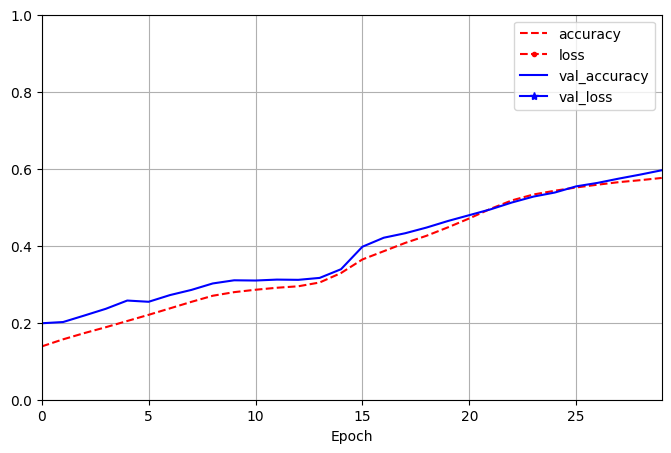

In [24]:
import matplotlib.pyplot as plt;
import pandas as pd;

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
);
plt.show();

In [27]:
#trying to increase performance

# Add Batch Normalization
# It will stabilizes the learning process and significantly accelerates convergance by re-centering and rescaling
# thinputs to each layer

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(300, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
]);

# The slow decrease in loss suggestes the model is stuck, so I will try using Adam for
# optimizer with learning_rate=0.001
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=["accuracy"]);

# Instead of gussing the number of epochs, I will make the model stops when
# it stops improving.
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True);
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=[early_stopping_cb]);

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7958 - loss: 0.5785 - val_accuracy: 0.8584 - val_loss: 0.3835
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8663 - loss: 0.3695 - val_accuracy: 0.8494 - val_loss: 0.3897
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8817 - loss: 0.3200 - val_accuracy: 0.8662 - val_loss: 0.3695
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8943 - loss: 0.2892 - val_accuracy: 0.8558 - val_loss: 0.4039
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - accuracy: 0.9044 - loss: 0.2601 - val_accuracy: 0.8674 - val_loss: 0.3772
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9125 - loss: 0.2371 - val_accuracy: 0.8296 - val_loss: 0.4761
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9201 - loss: 0.2161 - val_accuracy: 0.8404 - val_loss: 0.4677
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9236 -

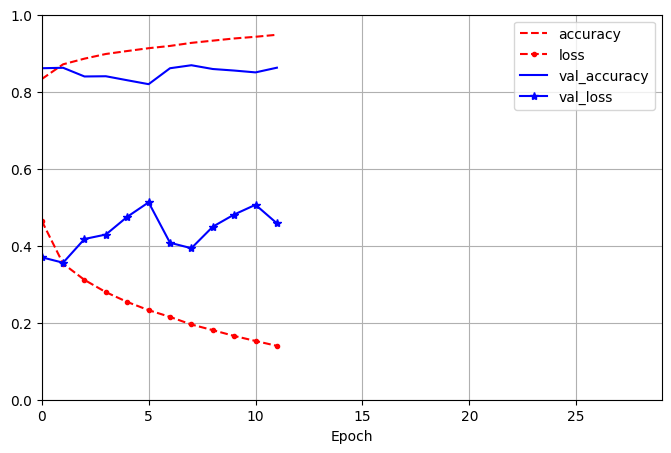

In [26]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5),
    xlim=[0, 29],
    ylim=[0, 1],
    grid=True,
    xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
);
plt.show();

The model is now Over Fitting, so